In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils.FuzzyOperations import de_A, u_A
from Simulacion import Simulacion, Simulacion_CLD
import pandas as pd

1. La planta

2. Controlador (CLD)

Se definen los valores difusos y las reglas difusas.

In [3]:
# Valores difusos trapezoidales
# TODO dejar la implementacion que quede más simple de usar

Fuzzy_Values = {
    "Ng" : (-1.0, -1.0, -0.8, -0.6),
    "Nm" : (-0.8, -0.6, -0.4, -0.2),
    "Np" : (-0.5, -0.4, -0.2, -0.1),
    "Ni" : (-0.2, -0.1, 0.0, 0.0),
    "Ce" : (-0.1, 0.0, 0.0, 0.1),
    "Pi" : (0.0, 0.0, 0.1, 0.2),
    "Pp" : (0.1, 0.2, 0.4, 0.5),
    "Pm" : (0.4, 0.4, 0.6, 0.8),
    "Pg" : (0.6, 0.8, 1.0, 1.0)
}

In [4]:
# Se definen conjuntos de_A necesarios
All_Fuzzy_Values = Fuzzy_Values.copy()
All_Fuzzy_Values["de_A_Ng_Pp"] = de_A(Fuzzy_Values["Ng"], Fuzzy_Values["Pp"])
All_Fuzzy_Values["de_A_Ng_Nm"] = de_A(Fuzzy_Values["Ng"], Fuzzy_Values["Nm"])
All_Fuzzy_Values["de_A_Ng_Np"] = de_A(Fuzzy_Values["Ng"], Fuzzy_Values["Np"])
All_Fuzzy_Values["de_A_Np_Pi"] = de_A(Fuzzy_Values["Np"], Fuzzy_Values["Pi"])
All_Fuzzy_Values["de_A_Ng_Nm"] = de_A(Fuzzy_Values["Ng"], Fuzzy_Values["Nm"])
All_Fuzzy_Values["de_A_Pm_Pg"] = de_A(Fuzzy_Values["Pm"], Fuzzy_Values["Pg"])
All_Fuzzy_Values["de_A_Ni_Pi"] = de_A(Fuzzy_Values["Ni"], Fuzzy_Values["Pi"])
All_Fuzzy_Values["de_A_Np_Pg"] = de_A(Fuzzy_Values["Np"], Fuzzy_Values["Pg"])
All_Fuzzy_Values["de_A_Pp_Pg"] = de_A(Fuzzy_Values["Pp"], Fuzzy_Values["Pg"])
All_Fuzzy_Values["de_A_Ni_Pi"] = de_A(Fuzzy_Values["Ni"], Fuzzy_Values["Pi"])

# Función para crear un vector con los grados de pertenencia a cierto conjunto en un dominio dado.
pertenencia_conjunto = lambda C, dominio: np.array(list(map(lambda x: u_A(C, x), dominio)))

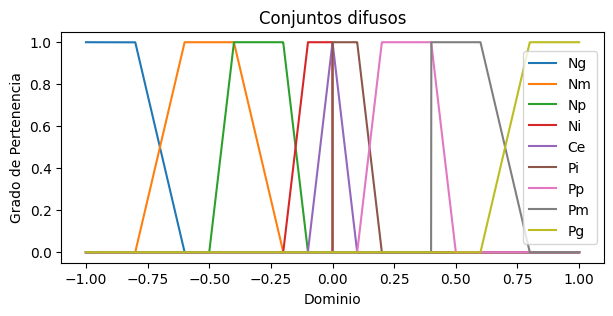

In [5]:
# Gráfico de conjuntos difusos.
dominio = np.linspace(-1, 1, 2000)
fig = plt.figure(figsize=(7, 3))
for name, A in Fuzzy_Values.items():
    plt.plot(dominio, pertenencia_conjunto(A, dominio), label=name)
plt.title("Conjuntos difusos")
plt.xlabel("Dominio")
plt.ylabel("Grado de Pertenencia")
plt.legend()
plt.show()

In [6]:
# Mapa de reglas en base a 2 variables difusas: EP y TP. Salida es deltaH.
mapa_reglas = {}

# Regla 1
mapa_reglas[(All_Fuzzy_Values["Ng"], All_Fuzzy_Values["de_A_Ng_Pp"])] = All_Fuzzy_Values["Pg"]
print(len(mapa_reglas), end=", ")
# Regla 2
mapa_reglas[(All_Fuzzy_Values["de_A_Ng_Nm"], All_Fuzzy_Values["de_A_Ng_Np"])] = All_Fuzzy_Values["Pm"]
print(len(mapa_reglas), end=", ")
# Regla 3
mapa_reglas[(All_Fuzzy_Values["Np"], All_Fuzzy_Values["de_A_Np_Pi"])] = All_Fuzzy_Values["Pm"]
print(len(mapa_reglas), end=", ")
# Regla 4
mapa_reglas[(All_Fuzzy_Values["Ni"], All_Fuzzy_Values["de_A_Ng_Nm"])] = All_Fuzzy_Values["Pm"]
print(len(mapa_reglas), end=", ")
# Regla 5
mapa_reglas[(All_Fuzzy_Values["Ni"], All_Fuzzy_Values["de_A_Pm_Pg"])] = All_Fuzzy_Values["Np"]
print(len(mapa_reglas), end=", ")
# Regla 6
mapa_reglas[(All_Fuzzy_Values["de_A_Ni_Pi"], All_Fuzzy_Values["Ce"])] = All_Fuzzy_Values["Ce"]
print(len(mapa_reglas), end=", ")
# Regla 7
mapa_reglas[(All_Fuzzy_Values["Pi"], All_Fuzzy_Values["de_A_Ng_Nm"])] = All_Fuzzy_Values["Pp"]
print(len(mapa_reglas), end=", ")
# Regla 8
mapa_reglas[(All_Fuzzy_Values["Pi"], All_Fuzzy_Values["de_A_Pm_Pg"])] = All_Fuzzy_Values["Nm"]
print(len(mapa_reglas), end=", ")
# Regla 9
mapa_reglas[(All_Fuzzy_Values["Pp"], All_Fuzzy_Values["de_A_Np_Pg"])] = All_Fuzzy_Values["Nm"]
print(len(mapa_reglas), end=", ")
# Regla 10
mapa_reglas[(All_Fuzzy_Values["de_A_Pm_Pg"], All_Fuzzy_Values["de_A_Pp_Pg"])] = All_Fuzzy_Values["Nm"]
print(len(mapa_reglas), end=", ")
# Regla 11
mapa_reglas[(All_Fuzzy_Values["Pg"], All_Fuzzy_Values["de_A_Np_Pg"])] = All_Fuzzy_Values["Ng"]
print(len(mapa_reglas), end=", ")
# Regla 12
mapa_reglas[(All_Fuzzy_Values["Ni"], All_Fuzzy_Values["Pp"])] = All_Fuzzy_Values["Ce"]
print(len(mapa_reglas), end=", ")
# Regla 13
mapa_reglas[(All_Fuzzy_Values["Ni"], All_Fuzzy_Values["Np"])] = All_Fuzzy_Values["Pp"]
print(len(mapa_reglas), end=", ")
# Regla 14
mapa_reglas[(All_Fuzzy_Values["Pi"], All_Fuzzy_Values["Np"])] = All_Fuzzy_Values["Ce"]
print(len(mapa_reglas), end=", ")
# Regla 15
mapa_reglas[(All_Fuzzy_Values["Pi"], All_Fuzzy_Values["Pp"])] = All_Fuzzy_Values["Np"]
print(len(mapa_reglas), end=", ")
# Regla 16
mapa_reglas[(All_Fuzzy_Values["de_A_Ng_Np"], All_Fuzzy_Values["de_A_Pm_Pg"])] = All_Fuzzy_Values["Pg"]
print(len(mapa_reglas), end=", ")
# Regla 17
mapa_reglas[(All_Fuzzy_Values["de_A_Pp_Pg"], All_Fuzzy_Values["de_A_Ng_Nm"])] = All_Fuzzy_Values["Ng"]
print(len(mapa_reglas))

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17


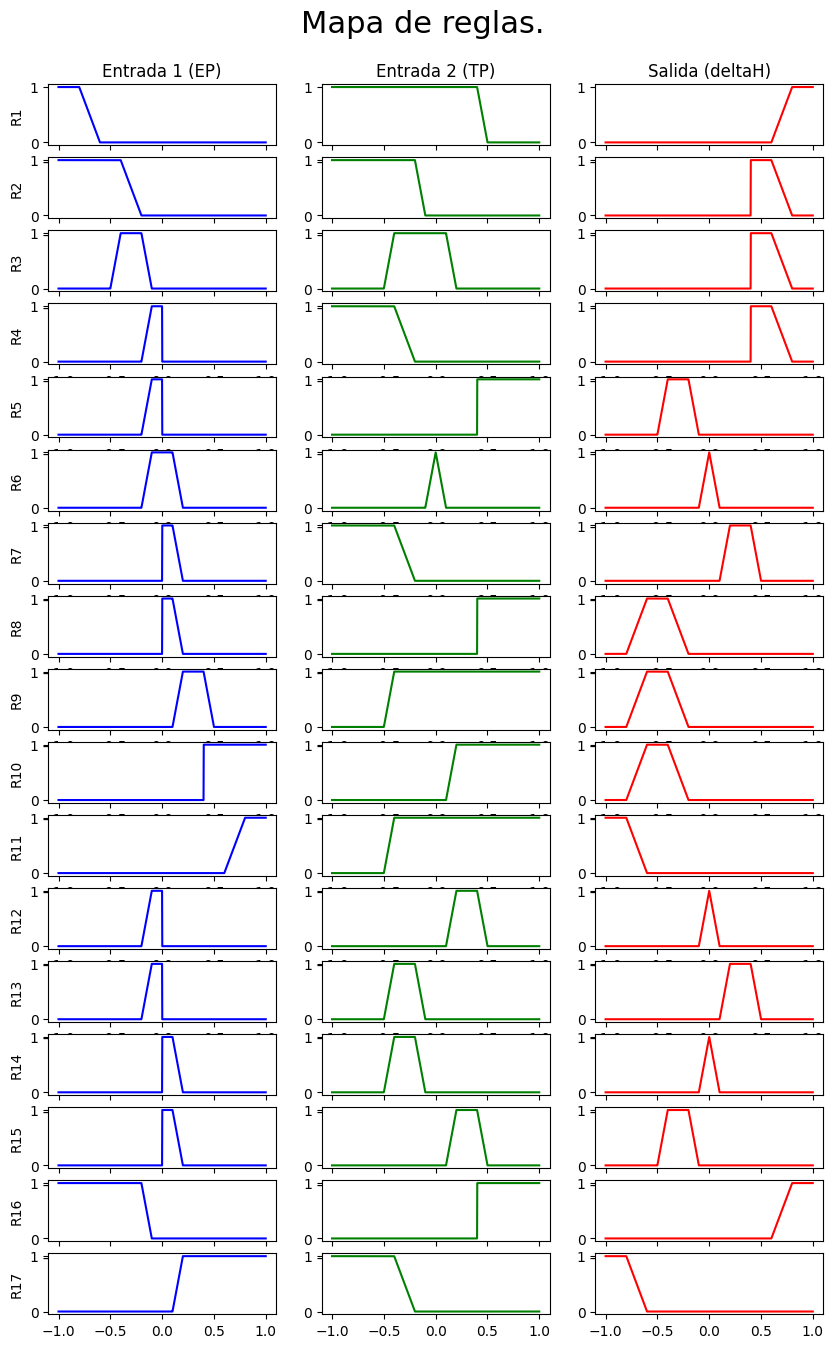

In [7]:
# Gráfico de reglas difusas
dominio = np.linspace(-1, 1, 2000)
grafico_conjunto = lambda C: np.array(list(map(lambda x: u_A(C, x), dominio)))

fig, ax = plt.subplots(nrows=17, ncols=3, figsize=(10,15))
for i, (A, B) in enumerate(mapa_reglas.keys()):
    ax[i, 0].set_ylabel(f"R{i+1}")
    ax[i, 0].plot(dominio, grafico_conjunto(A), color="b")
    ax[i, 1].plot(dominio, grafico_conjunto(B), color="g")
    ax[i, 2].plot(dominio, grafico_conjunto(mapa_reglas[(A, B)]), color="r")

ax[0,0].set_title("Entrada 1 (EP)")
ax[0,1].set_title("Entrada 2 (TP)")
ax[0,2].set_title("Salida (deltaH)")

plt.subplots_adjust(top=0.93)  # Parámetro que hace que se vea bien
plt.suptitle("Mapa de reglas.", fontsize=22)

plt.show()


2. Controlador CLD

In [8]:
#presion objetivo
PO = 750
# condicion incial

def estandarizar_valor(valor, minimo_rango=-15, maximo_rango=15, minimo_estandarizado=-1, maximo_estandarizado=1):
    """
    Fuzzifica valores de [-15,15] a [-1,1]
    """
    x_estandarizado = ((valor - minimo_rango) / (maximo_rango - minimo_rango)) * (maximo_estandarizado - minimo_estandarizado) + minimo_estandarizado
    return x_estandarizado
    

def fuzzyfucacion(Pt, EP0=0):
    """
    Satura los valores entre -15 a 15 y luego los fuzzifica con el estandarizador
    """
    EP = Pt-PO
    EP = max(min(EP, 15), -15)
    TP =  EP-EP0
    TP = max(min(TP, 15), -15)
    return estandarizar_valor(EP), estandarizar_valor(TP)


In [78]:
pertenencia = [0,1,1,0]
n_puntos = 41
muestreo = np.linspace(-1,1,n_puntos)

def regla_min(corte, pertenencia_original):
    """
    Satura los valores de pertenencia de un conjunto en el corte
    """
    filtro = pertenencia_original <= corte
    return pertenencia_original*(filtro)+(~filtro)*corte



def grad_pertenencia(inter, conjunto):
    """
    interpolacion para obtener los valores intermedios de un conjunto
    """
    return np.interp(inter, conjunto, pertenencia)

    
def r_centro_gravedad(mapa_reglas, activacion):
    """
    Regla de centro de gravedad, recive las reglas y el grado de activacion de cada una
    Retorna el valor perteneciente al centro de gravedad
    """
    # Salida de cada regla con la saturacion aplicada
    salida = []
    for i, c_salida in enumerate(mapa_reglas.values()):
        # se muestre el conjunto de salida
        conjunto_muestreado = grad_pertenencia(muestreo, c_salida)
        # se satura el valor con el minimo de las entradas
        salida.append(regla_min(activacion[i], conjunto_muestreado))
    # se toma la covertura de las 17 salidas
    covertura = np.maximum.reduce(salida)
    # retorno del centro de gravedad
    if (np.sum(covertura))==0:
        return 0
    return np.sum(muestreo*covertura)/(np.sum(covertura))
    


def step_controlado(Pt, EP0=0,mapa_reglas=mapa_reglas, regla=r_centro_gravedad, participacion=False, iteracion=0):
    """
    Funcionamiento de un instante del controlador. 
    """
    
    E1, E2 = fuzzyfucacion(Pt,EP0)
    if participacion:
        if iteracion==0:
            columnas = ["EP", "TP"]
            plano = pd.DataFrame(columns = columnas)
            plano.loc[iteracion]=[E1, E2] 
            
            plano.to_csv("plano.csv")
        else:
            plano = pd.read_csv("plano.csv", index_col=0)
            
            plano.loc[iteracion]=[E1, E2] 
            plano.to_csv("plano.csv")


    print(f"E1 {E1}, E2: {E2}")
    
    # lista de grado de activacion de cada salida
    activacion = []
    # se obtiene l
    for i, (r_error, r_tasa_cambio_error) in enumerate(mapa_reglas.keys()):
        valor_act = min(u_A(r_error, E1), u_A(r_tasa_cambio_error, E2))
        activacion.append(valor_act)
    if participacion:
        if iteracion==0:
            columnas = ["R"+str(i) for i in range(len(mapa_reglas.keys()))]
            data_participacion = pd.DataFrame(columns = columnas)
            data_participacion.loc[iteracion]=activacion
            
            data_participacion.to_csv("regla_participacion.csv")
        else:
            data_participacion = pd.read_csv("regla_participacion.csv", index_col=0)
            
            print(len(activacion))
            data_participacion.loc[iteracion] = activacion
            data_participacion.to_csv("regla_participacion.csv")

            
    
    return regla(mapa_reglas, activacion)


In [79]:
def controlador(P_0, regla, K=0.6, mapa_reglas=mapa_reglas ,n_times=100,participacion=False):
    EP0 = 0
    for instante in range(n_times):
        print(f"Instante : {instante}")
        print(f"Presion : {P_0}, EP0 :{EP0}")
        plt.plot(instante,P_0,"o")
        d_H = step_controlado(P_0, EP0, mapa_reglas=mapa_reglas, regla=regla,participacion=participacion,iteracion=instante)
        d_H = estandarizar_valor(d_H,-1,1,-15,15)
        print(f"Delta Calor : {d_H}")
        print(f"--------------------------------------")
        EP0 = P_0-PO
        d_P = K*d_H
        P_0 = P_0+d_P

    plt.show()

Instante : 0
Presion : 630, EP0 :0
E1 -1.0, E2: -1.0
Delta Calor : 10.090909090909093
--------------------------------------
Instante : 1
Presion : 636.0545454545454, EP0 :-120
E1 -1.0, E2: 1.0
17
Delta Calor : 12.47727272727273
--------------------------------------
Instante : 2
Presion : 643.540909090909, EP0 :-113.9454545454546
E1 -1.0, E2: 1.0
17
Delta Calor : 12.47727272727273
--------------------------------------
Instante : 3
Presion : 651.0272727272727, EP0 :-106.45909090909095
E1 -1.0, E2: 1.0
17
Delta Calor : 12.47727272727273
--------------------------------------
Instante : 4
Presion : 658.5136363636364, EP0 :-98.9727272727273
E1 -1.0, E2: 1.0
17
Delta Calor : 12.47727272727273
--------------------------------------
Instante : 5
Presion : 666.0, EP0 :-91.48636363636365
E1 -1.0, E2: 1.0
17
Delta Calor : 12.47727272727273
--------------------------------------
Instante : 6
Presion : 673.4863636363636, EP0 :-84.0
E1 -1.0, E2: 1.0
17
Delta Calor : 12.47727272727273
------------

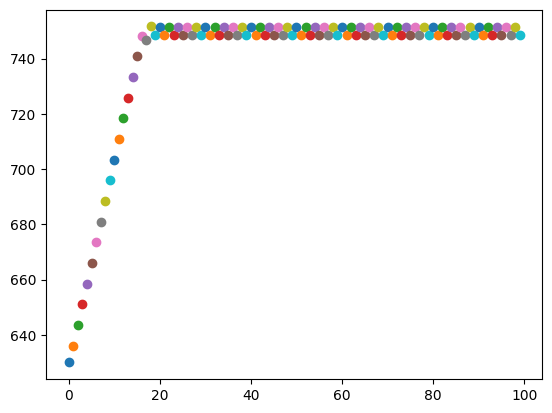

In [80]:
controlador(630, regla=r_centro_gravedad, n_times=100, participacion=True)

In [77]:
data_participacion = pd.read_csv("regla_participacion.csv", index_col=0)
# data_participacion= data_participacion.drop("Unnamed: 0", axis=1)
data_participacion.describe()

,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16
count,100.000000,100.000000,100.00,100.0,100.000,100.0,100.0,100.0,100.000000,100.0,100.0,100.000000,100.000000,100.0,100.000000,100.000000,100.0
mean,0.010091,0.010502,0.01,0.0,0.009,0.0,0.0,0.0,0.001036,0.0,0.0,0.000091,0.329986,0.0,0.328964,0.151000,0.0
std,0.099995,0.100075,0.10,0.0,0.090,0.0,0.0,0.0,0.010363,0.0,0.0,0.000909,0.398332,0.0,0.396726,0.358587,0.0
min,0.000000,0.000000,0.00,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.00,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.00,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.000000,0.000000,0.00,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.800000,0.0,0.800000,0.000000,0.0
max,1.000000,1.000000,1.00,0.0,0.900,0.0,0.0,0.0,0.103627,0.0,0.0,0.009091,0.998642,0.0,0.896373,1.000000,0.0


In [83]:
data_participacion = pd.read_csv("plano.csv", index_col=0)
# data_participacion= data_participacion.drop("Unnamed: 0", axis=1)
data_participacion

,EP,TP
0,-1.000000,-1.00
1,-1.000000,1.00
2,-1.000000,1.00
3,-1.000000,1.00
4,-1.000000,1.00
...,...,...
95,-0.089502,-0.18
96,0.090498,0.18
97,-0.089502,-0.18
98,0.090498,0.18


Instante : 0
Presion : 720, EP0 :0
E1 -1.0, E2: -1.0
Delta Calor : 10.336363636363643
--------------------------------------
Instante : 1
Presion : 726.2018181818182, EP0 :-30
E1 -1.0, E2: 1.0
Delta Calor : 12.589655172413792
--------------------------------------
Instante : 2
Presion : 733.7556112852665, EP0 :-23.798181818181774
E1 -1.0, E2: 0.5865454545454516
Delta Calor : 12.589655172413792
--------------------------------------
Instante : 3
Presion : 741.3094043887147, EP0 :-16.24438871473353
E1 -0.5793730407523526, E2: 0.5035862068965495
Delta Calor : 12.589655172413792
--------------------------------------
Instante : 4
Presion : 748.863197492163, EP0 :-8.69059561128529
E1 -0.07578683385580309, E2: 0.5035862068965495
Delta Calor : -4.5
--------------------------------------
Instante : 5
Presion : 746.1631974921629, EP0 :-1.1368025078370465
E1 -0.25578683385580614, E2: -0.18000000000000305
Delta Calor : 8.254838709677419
--------------------------------------
Instante : 6
Presion 

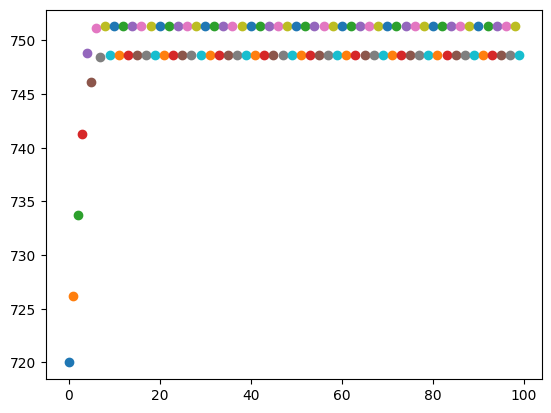

In [68]:
controlador(720, regla=r_centro_gravedad, n_times=100)

Instante : 0
Presion : 830, EP0 :0
E1 1.0, E2: 1.0
Delta Calor : -9.736363636363638
--------------------------------------
Instante : 1
Presion : 824.1581818181818, EP0 :80
E1 1.0, E2: -1.0
Delta Calor : -12.74516129032258
--------------------------------------
Instante : 2
Presion : 816.5110850439883, EP0 :74.15818181818179
E1 1.0, E2: -1.0
Delta Calor : -12.74516129032258
--------------------------------------
Instante : 3
Presion : 808.8639882697947, EP0 :66.51108504398826
E1 1.0, E2: -1.0
Delta Calor : -12.74516129032258
--------------------------------------
Instante : 4
Presion : 801.2168914956012, EP0 :58.86398826979473
E1 1.0, E2: -1.0
Delta Calor : -12.74516129032258
--------------------------------------
Instante : 5
Presion : 793.5697947214077, EP0 :51.2168914956012
E1 1.0, E2: -1.0
Delta Calor : -12.74516129032258
--------------------------------------
Instante : 6
Presion : 785.9226979472141, EP0 :43.569794721407675
E1 1.0, E2: -1.0
Delta Calor : -12.74516129032258
-------

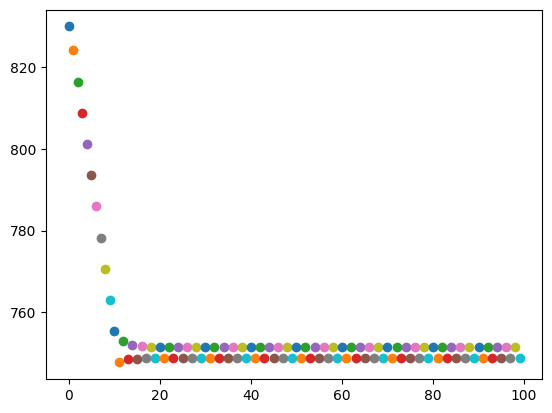

In [69]:
controlador(830, regla=r_centro_gravedad, n_times=100)
        

3. Parámetros de simulación

In [96]:
def controlador_2(P_0, regla,c, K=0.6, mapa_reglas=mapa_reglas ,n_times=100):
    EP0 = 0
    d_H_planta = 0
    d_P = 0
    for instante in range(n_times):
        print(f"Instante : {instante}")
        print(f"Presion : {P_0}, EP0 :{EP0}")
        plt.plot(instante,P_0,"o")
        d_H_controlador = step_controlado(P_0, EP0, mapa_reglas=mapa_reglas, regla=r_centro_gravedad)
        d_H_controlador = estandarizar_valor(d_H_controlador,-1,1,-15,15)
        print(f"Delta Calor controlador: {d_H_controlador}")
        print(f"Delta Calor planta: {d_H_planta}")

        print(f"--------------------------------------")
        d_H_planta = d_H_planta + 1*d_H_controlador # t+1
        d_P = K*d_H_planta + c*d_P

        EP0 = P_0-PO
        
        P_0 = P_0 + d_P
    plt.show()

Instante : 0
Presion : 760, EP0 :0
E1 0.6666666666666667, E2: 0.6666666666666667
Delta Calor controlador: -8.481440443213298
Delta Calor planta: 0
--------------------------------------
Instante : 1
Presion : 754.911135734072, EP0 :10
E1 0.3274090489381327, E2: -0.3392576177285339
Delta Calor controlador: -9.288248774852208
Delta Calor planta: -8.481440443213298
--------------------------------------
Instante : 2
Presion : 743.7404357766399, EP0 :4.9111357340719906
E1 -0.4173042815573429, E2: -0.7447133304954756
Delta Calor controlador: 8.254838709677419
Delta Calor planta: -17.76968921806551
--------------------------------------
Instante : 3
Presion : 736.9144554758637, EP0 :-6.259564223360144
E1 -0.8723696349424168, E2: -0.4550653533850739
Delta Calor controlador: 10.336363636363643
Delta Calor planta: -9.51485050838809
--------------------------------------
Instante : 4
Presion : 736.7247653225714, EP0 :-13.085544524136253
E1 -0.8850156451619038, E2: -0.01264601021948697
Delta Calo

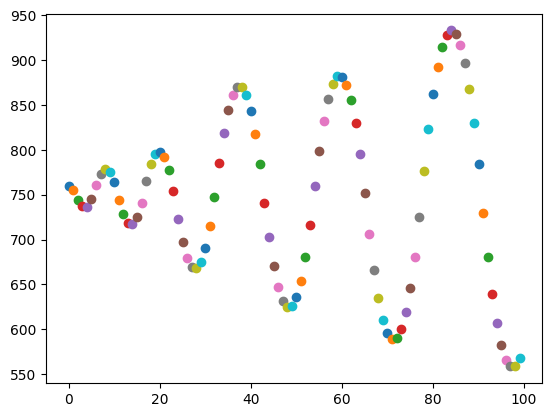

In [98]:
controlador_2(760, regla=r_centro_gravedad, c=0.1, n_times=100)

In [ ]:
controlador(830, regla=r_centro_gravedad, n_times=100)